# Detectron2: Zebrafish

## Install detectron2


## Train on a custom dataset

In [1]:
# general
import os

# custom code
import zebrafish.trainers.TrainingUtil as TrainingUtil

from zebrafish.configs import get_instance_segmentation_config
from zebrafish.trainers.CocoTrainer import CocoTrainer
from zebrafish.visualization import plot_train_vs_validation_loss, plot_dataset, plot_prediction
from zebrafish.dataset import register_datasets

#detectron
from detectron2.utils.logger import setup_logger


setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")


In [2]:
use_direction_classes = True
register_datasets("dataset", use_direction_classes=use_direction_classes)

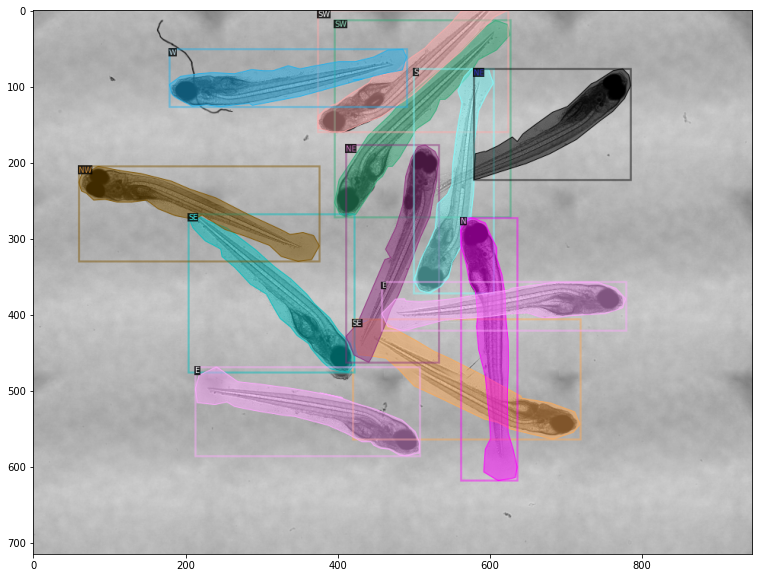

In [3]:
plot_dataset("train")

Here we fine tune a model from the zoo to our dataset.

In [4]:
train_set = "train"
val_set = "val"
max_iter = 1000


cfg = get_instance_segmentation_config(
    train_set, 
    val_set, 
    max_iter=max_iter,
)

In [5]:
cfg.SOLVER.MAX_ITER = 1000

In [ ]:
resume = False
TrainingUtil.train(cfg, resume=resume)

[05/24 21:44:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[05/24 21:44:44 d2.data.build]: Removed 0 images with no usable annotations. 5 images left.
[05/24 21:44:44 d2.data.build]: Distribution of instances among all 8 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|     N      | 8            |     NE     | 10           |     E      | 11           |
|     SE     | 4            |     S      | 5            |     SW     | 10           |
|     W      | 16           |     NW     | 5            |            |              |
|   total    | 69           |            |              |            |              |
[05/24 21:44:44 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:44:44 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:44:44 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 80

[05/24 21:45:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.084121 s / img per device, on 1 devices)
[05/24 21:45:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/24 21:45:12 d2.evaluation.coco_evaluation]: Saving results to output/2020_05_24_21_44_41/inference/coco_instances_results.json
[05/24 21:45:12 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:45:27 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:45:27 d2.evaluation.coco_evaluation]: Per-category segm AP: 
| category   | AP    | category   | AP    | category   | AP    |
|:-----------|:------|:-----------|:------|:-----------|:------|
| N          | 0.000 | NE         | 0.000 | E          | 0.121 |
| SE         | 0.000 | S          | 0.139 | SW         | 0.000 |
| W          | 0.000 | NW         | 0.000 |            |       |
[05/24 21:45:27 d2.engine.defaults]: Evaluation results for val in csv format:
[05/24 21:45:27 d2.evaluation.testing]: copypaste: Task: bbox
[05/24 21:45:27 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:45:27 d2.evaluation.testing]: copypaste: 1.8235,5.3613,1.2109,nan,11.3325,1.6484
[05/24 21:45:27 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:45:27 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:45:27 d2.evaluation.testing]: copypaste: 0.0325,0.2095,0.

[05/24 21:45:56 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:45:56 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP    | category   | AP     |
|:-----------|:-------|:-----------|:------|:-----------|:-------|
| N          | 13.761 | NE         | 4.726 | E          | 21.365 |
| SE         | 2.359  | S          | 0.582 | SW         | 8.852  |
| W          | 24.228 | NW         | 5.907 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= s

[05/24 21:46:11 d2.evaluation.testing]: copypaste: 13.5997,31.9177,7.9085,nan,55.0743,8.9756
[05/24 21:46:11 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:46:11 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:46:11 d2.evaluation.testing]: copypaste: 0.2497,2.0638,0.0000,nan,1.0545,0.1748
[05/24 21:46:11 d2.utils.events]:  eta: 0:08:02  iter: 119  total_loss: 2.016  loss_cls: 0.670  loss_box_reg: 0.757  loss_mask: 0.494  loss_rpn_cls: 0.009  loss_rpn_loc: 0.064  validation_loss: 2.204  time: 0.5537  data_time: 0.0127  lr: 0.000240  max_mem: 5045M
[05/24 21:46:22 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:46:22 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:46:22 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:46:25 d2.evaluation.evaluator]: Total inference time: 0:00:00.380093 (0.380093 s / img per device, on 1 devices)
[05/24 21:46:25 d2.evaluation.evaluator]: Total infer

[05/24 21:46:39 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:46:39 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 32.720 | NE         | 12.997 | E          | 35.013 |
| SE         | 12.419 | S          | 12.228 | SW         | 17.042 |
| W          | 27.940 | NW         | 13.699 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.049
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.187
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:46:53 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:46:53 d2.evaluation.testing]: copypaste: 22.3974,49.2409,17.8143,nan,67.8218,15.7407
[05/24 21:46:53 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:46:53 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:46:53 d2.evaluation.testing]: copypaste: 10.8014,26.3442,6.7523,nan,35.3956,8.8141
[05/24 21:46:54 d2.utils.events]:  eta: 0:07:22  iter: 179  total_loss: 1.693  loss_cls: 0.567  loss_box_reg: 0.684  loss_mask: 0.356  loss_rpn_cls: 0.004  loss_rpn_loc: 0.058  validation_loss: 2.180  time: 0.5465  data_time: 0.0122  lr: 0.000359  max_mem: 5045M
[05/24 21:47:04 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:47:04 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:47:04 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:47:07 d2.evaluation.evaluator]: Total inference time: 0:00:00.371772 (0.371772 s / im

[05/24 21:47:21 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:47:21 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 43.095 | NE         | 23.877 | E          | 38.120 |
| SE         | 13.519 | S          | 21.355 | SW         | 36.176 |
| W          | 56.835 | NW         | 20.808 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.210
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.486
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:47:35 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:47:35 d2.evaluation.testing]: copypaste: 35.6022,63.5862,35.4554,nan,64.2574,30.5705
[05/24 21:47:35 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:47:35 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:47:35 d2.evaluation.testing]: copypaste: 24.0189,54.5945,17.5895,nan,50.7726,21.5681
[05/24 21:47:36 d2.utils.events]:  eta: 0:06:42  iter: 239  total_loss: 1.288  loss_cls: 0.459  loss_box_reg: 0.512  loss_mask: 0.257  loss_rpn_cls: 0.003  loss_rpn_loc: 0.055  validation_loss: 1.926  time: 0.5414  data_time: 0.0121  lr: 0.000479  max_mem: 5045M
[05/24 21:47:46 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:47:46 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:47:46 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:47:49 d2.evaluation.evaluator]: Total inference time: 0:00:00.334772 (0.334772 s / 

[05/24 21:48:03 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:48:03 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 59.524 | NE         | 60.567 | E          | 51.192 |
| SE         | 29.249 | S          | 23.783 | SW         | 37.429 |
| W          | 57.093 | NW         | 25.869 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.327
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.675
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.263
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:48:16 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:48:16 d2.evaluation.testing]: copypaste: 48.7099,80.6709,49.3171,nan,62.5495,45.8472
[05/24 21:48:16 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:48:16 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:48:16 d2.evaluation.testing]: copypaste: 37.6881,72.5655,42.2675,nan,63.8530,35.5848
[05/24 21:48:17 d2.utils.events]:  eta: 0:06:09  iter: 299  total_loss: 1.062  loss_cls: 0.373  loss_box_reg: 0.395  loss_mask: 0.229  loss_rpn_cls: 0.001  loss_rpn_loc: 0.053  validation_loss: 1.908  time: 0.5374  data_time: 0.0119  lr: 0.000599  max_mem: 5045M
[05/24 21:48:27 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:48:27 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:48:27 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:48:30 d2.evaluation.evaluator]: Total inference time: 0:00:00.193698 (0.193698 s / 

[05/24 21:48:43 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:48:43 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 72.562 | NE         | 70.022 | E          | 51.783 |
| SE         | 45.690 | S          | 42.070 | SW         | 47.126 |
| W          | 62.551 | NW         | 43.226 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.433
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.746
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.511
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:48:57 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:48:57 d2.evaluation.testing]: copypaste: 48.0003,84.0142,54.5267,nan,60.0990,44.7453
[05/24 21:48:57 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:48:57 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:48:57 d2.evaluation.testing]: copypaste: 41.9932,75.6375,42.7824,nan,63.6445,39.1946
[05/24 21:48:58 d2.utils.events]:  eta: 0:05:37  iter: 359  total_loss: 0.995  loss_cls: 0.373  loss_box_reg: 0.347  loss_mask: 0.216  loss_rpn_cls: 0.002  loss_rpn_loc: 0.050  validation_loss: 1.443  time: 0.5361  data_time: 0.0124  lr: 0.000719  max_mem: 5045M
[05/24 21:49:08 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:49:08 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:49:08 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:49:10 d2.evaluation.evaluator]: Total inference time: 0:00:00.230507 (0.230507 s / 

[05/24 21:49:24 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:49:24 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 58.276 | NE         | 48.614 | E          | 65.530 |
| SE         | 38.082 | S          | 44.668 | SW         | 42.729 |
| W          | 66.469 | NW         | 44.785 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.417
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.847
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.432
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:49:37 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:49:37 d2.evaluation.testing]: copypaste: 60.4056,95.2674,70.0836,nan,76.3738,57.2590
[05/24 21:49:37 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:49:37 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:49:37 d2.evaluation.testing]: copypaste: 43.7254,78.0102,52.1028,nan,66.2222,40.9758
[05/24 21:49:38 d2.utils.events]:  eta: 0:05:06  iter: 419  total_loss: 0.943  loss_cls: 0.317  loss_box_reg: 0.332  loss_mask: 0.185  loss_rpn_cls: 0.002  loss_rpn_loc: 0.044  validation_loss: 1.244  time: 0.5357  data_time: 0.0114  lr: 0.000838  max_mem: 5045M
[05/24 21:49:49 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:49:49 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:49:49 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:49:51 d2.evaluation.evaluator]: Total inference time: 0:00:00.247253 (0.247253 s / 

[05/24 21:50:04 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:50:04 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 61.679 | NE         | 61.964 | E          | 64.056 |
| SE         | 61.931 | S          | 51.634 | SW         | 48.857 |
| W          | 52.999 | NW         | 64.629 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.837
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:50:18 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:50:18 d2.evaluation.testing]: copypaste: 54.8306,95.3750,59.0815,nan,76.7203,51.5813
[05/24 21:50:18 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:50:18 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:50:18 d2.evaluation.testing]: copypaste: 47.7432,88.4234,49.2994,nan,68.9404,45.7405
[05/24 21:50:18 d2.utils.events]:  eta: 0:04:34  iter: 479  total_loss: 0.864  loss_cls: 0.267  loss_box_reg: 0.363  loss_mask: 0.191  loss_rpn_cls: 0.001  loss_rpn_loc: 0.040  validation_loss: 1.073  time: 0.5347  data_time: 0.0109  lr: 0.000958  max_mem: 5045M
[05/24 21:50:29 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:50:29 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:50:29 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:50:31 d2.evaluation.evaluator]: Total inference time: 0:00:00.225426 (0.225426 s / 

[05/24 21:50:44 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:50:44 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 61.943 | NE         | 56.684 | E          | 52.961 |
| SE         | 62.054 | S          | 49.868 | SW         | 59.898 |
| W          | 64.567 | NW         | 44.059 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.488
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.839
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.482
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:50:58 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:50:58 d2.evaluation.testing]: copypaste: 62.7028,96.6348,80.7572,nan,72.6238,60.8795
[05/24 21:50:58 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:50:58 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:50:58 d2.evaluation.testing]: copypaste: 56.1164,89.0495,69.4799,nan,73.6757,54.3829
[05/24 21:50:58 d2.utils.events]:  eta: 0:04:02  iter: 539  total_loss: 0.835  loss_cls: 0.249  loss_box_reg: 0.339  loss_mask: 0.162  loss_rpn_cls: 0.003  loss_rpn_loc: 0.040  validation_loss: 0.983  time: 0.5352  data_time: 0.0123  lr: 0.001000  max_mem: 5045M
[05/24 21:51:10 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:51:10 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:51:10 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:51:11 d2.evaluation.evaluator]: Total inference time: 0:00:00.208466 (0.208466 s / 

[05/24 21:51:25 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:51:25 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 64.045 | NE         | 68.204 | E          | 67.009 |
| SE         | 57.624 | S          | 62.079 | SW         | 57.897 |
| W          | 71.866 | NW         | 64.158 |            |        |
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.532
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.865
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.594
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:51:39 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:51:39 d2.evaluation.testing]: copypaste: 66.4080,97.4978,78.8909,nan,78.1188,65.4040
[05/24 21:51:39 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:51:39 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:51:39 d2.evaluation.testing]: copypaste: 55.9688,94.5068,57.2386,nan,76.1404,54.6024
[05/24 21:51:40 d2.utils.events]:  eta: 0:03:31  iter: 599  total_loss: 0.758  loss_cls: 0.208  loss_box_reg: 0.337  loss_mask: 0.153  loss_rpn_cls: 0.001  loss_rpn_loc: 0.039  validation_loss: 0.965  time: 0.5371  data_time: 0.0136  lr: 0.001000  max_mem: 5045M
[05/24 21:51:51 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:51:51 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:51:51 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:51:52 d2.evaluation.evaluator]: Total inference time: 0:00:00.165823 (0.165823 s / 

[05/24 21:52:06 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:52:06 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 76.089 | NE         | 62.036 | E          | 58.876 |
| SE         | 70.198 | S          | 74.604 | SW         | 52.731 |
| W          | 66.413 | NW         | 55.149 |            |        |
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.562
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.974
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.634
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:52:20 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:52:20 d2.evaluation.testing]: copypaste: 63.8408,99.6554,76.6454,nan,74.7277,60.6496
[05/24 21:52:20 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:52:20 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:52:20 d2.evaluation.testing]: copypaste: 49.6380,85.8975,54.2056,nan,69.0824,48.4813
[05/24 21:52:21 d2.utils.events]:  eta: 0:03:00  iter: 659  total_loss: 0.801  loss_cls: 0.239  loss_box_reg: 0.331  loss_mask: 0.170  loss_rpn_cls: 0.001  loss_rpn_loc: 0.039  validation_loss: 0.903  time: 0.5381  data_time: 0.0138  lr: 0.001000  max_mem: 5045M
[05/24 21:52:32 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:52:32 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:52:32 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:52:33 d2.evaluation.evaluator]: Total inference time: 0:00:00.201767 (0.201767 s / 

[05/24 21:52:47 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:52:47 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 61.681 | NE         | 58.295 | E          | 71.152 |
| SE         | 62.772 | S          | 68.495 | SW         | 55.307 |
| W          | 70.296 | NW         | 67.723 |            |        |
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.559
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.942
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.593
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

[05/24 21:53:01 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:53:01 d2.evaluation.testing]: copypaste: 69.4650,96.4647,90.7345,nan,74.2327,69.3633
[05/24 21:53:01 d2.evaluation.testing]: copypaste: Task: segm
[05/24 21:53:01 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/24 21:53:01 d2.evaluation.testing]: copypaste: 57.5585,92.6281,71.6169,nan,73.1889,56.4559
[05/24 21:53:01 d2.utils.events]:  eta: 0:02:28  iter: 719  total_loss: 0.668  loss_cls: 0.160  loss_box_reg: 0.290  loss_mask: 0.162  loss_rpn_cls: 0.002  loss_rpn_loc: 0.034  validation_loss: 0.843  time: 0.5404  data_time: 0.0125  lr: 0.001000  max_mem: 5045M
[05/24 21:53:12 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/24 21:53:12 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/24 21:53:12 d2.evaluation.evaluator]: Start inference on 5 images
[05/24 21:53:14 d2.evaluation.evaluator]: Total inference time: 0:00:00.175913 (0.175913 s / 

[05/24 21:53:28 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/24 21:53:28 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 70.975 | NE         | 71.212 | E          | 69.396 |
| SE         | 69.455 | S          | 75.842 | SW         | 76.692 |
| W          | 81.412 | NW         | 59.149 |            |        |
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.609
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.973
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.724
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

In [ ]:
plot_train_vs_validation_loss(cfg)

Here we create a predictor using the learned weights.

Here we display the prediction for the unseen testset.

In [ ]:
threshold = 0.5
n_images = 10
plot_prediction(cfg, "test", threshold=threshold, n_images=n_images)